# Data exploration


In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.decomposition import SparsePCA
from sklearn import random_projection
from sklearn.cluster import KMeans
import numpy as np

In [24]:
# wna_data = pd.read_csv('../data/p2_fmt_wNA.csv',sep='\t')
wna_data = pd.read_csv('../data/p5.csv')
# wna_data.iloc[:,2:] = wna_data.iloc[:,2:].add(1).fillna(0) # 填补0并将所有值+1
wna_data

,CHROM,POS,REF,ALT,K10G,K12G,K13G,K16G,K21G,K23G,...,metaspades_90,metaspades_91,metaspades_92,metaspades_93,metaspades_94,metawrap_assemle_2487B,metawrap_assemle_2487C,metawrap_assemle_2487D,metawrap_assemle_2487E,read
0,EGOHCJCO_00001,174,C,T,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,...,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,4/4/2/2/2,4/2/2/2/2,2/2/2/2/2,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA
1,EGOHCJCO_00001,184,C,T,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,...,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,4/4/2/2/2,4/2/2/2/2,2/2/2/2/2,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA
2,EGOHCJCO_00003,136,A,G,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,...,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,1/1/3/3/3,1/1/1/1/3,1/1/3/3/3,1/1/3/3/3,NA/NA/NA/NA/NA
3,EGOHCJCO_00006,114,T,C,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,...,2/2/2/2/2,2/2/2/2/2,2/2/2/2/2,2/2/2/2/2,2/2/2/2/2,2/2/2/2/2,2/2/2/2/2,2/2/2/2/2,2/2/2/2/2,NA/NA/NA/NA/NA
4,EGOHCJCO_00006,297,G,A,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,...,3/3/3/3/3,3/3/3/3/3,3/3/3/3/3,3/3/3/3/3,3/3/3/3/3,3/3/3/3/3,3/3/3/3/3,3/3/3/3/3,3/3/3/3/3,NA/NA/NA/NA/NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130782,KMKHEIEB_02137,357,G,A,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,...,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA
130783,KMKHEIEB_02144,443,C,T,NA/NA/NA/NA/NA,2/2/2/2/2,4/4/4/4/4,4/4/4/4/4,4/4/4/4/4,4/4/4/4/4,...,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA
130784,KMKHEIEB_02144,471,C,T,NA/NA/NA/NA/NA,2/2/2/2/2,4/4/4/4/4,4/4/4/4/4,4/4/4/4/4,4/4/4/4/4,...,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA
130785,KMKHEIEB_02144,473,C,T,NA/NA/NA/NA/NA,2/2/2/2/2,4/4/4/4/4,NA/NA/NA/NA/NA,4/4/4/4/4,4/4/4/4/4,...,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA


In [25]:
region = pd.read_csv('../data/id_region.txt',sep='\t')
region.head()

,Id,region1,region2
0,K10G,KA,KA
1,K12G,KA,KA
2,K13G,KA,KA
3,K16G,KA,KA
4,K21G,KA,KA


In [26]:
wna_data.iloc[:,4:]

,K10G,K12G,K13G,K16G,K21G,K23G,K25G,K28G,K29G,K38G,...,metaspades_90,metaspades_91,metaspades_92,metaspades_93,metaspades_94,metawrap_assemle_2487B,metawrap_assemle_2487C,metawrap_assemle_2487D,metawrap_assemle_2487E,read
0,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,...,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,4/4/2/2/2,4/2/2/2/2,2/2/2/2/2,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA
1,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,...,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,4/4/2/2/2,4/2/2/2/2,2/2/2/2/2,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA
2,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,...,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,1/1/3/3/3,1/1/1/1/3,1/1/3/3/3,1/1/3/3/3,NA/NA/NA/NA/NA
3,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,...,2/2/2/2/2,2/2/2/2/2,2/2/2/2/2,2/2/2/2/2,2/2/2/2/2,2/2/2/2/2,2/2/2/2/2,2/2/2/2/2,2/2/2/2/2,NA/NA/NA/NA/NA
4,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,...,3/3/3/3/3,3/3/3/3/3,3/3/3/3/3,3/3/3/3/3,3/3/3/3/3,3/3/3/3/3,3/3/3/3/3,3/3/3/3/3,3/3/3/3/3,NA/NA/NA/NA/NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130782,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,...,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA
130783,NA/NA/NA/NA/NA,2/2/2/2/2,4/4/4/4/4,4/4/4/4/4,4/4/4/4/4,4/4/4/4/4,NA/NA/NA/NA/NA,4/4/4/4/4,4/4/4/4/4,4/4/4/4/4,...,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA
130784,NA/NA/NA/NA/NA,2/2/2/2/2,4/4/4/4/4,4/4/4/4/4,4/4/4/4/4,4/4/4/4/4,NA/NA/NA/NA/NA,4/4/4/4/4,4/4/4/4/4,4/4/4/4/4,...,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA
130785,NA/NA/NA/NA/NA,2/2/2/2/2,4/4/4/4/4,NA/NA/NA/NA/NA,4/4/4/4/4,4/4/4/4/4,NA/NA/NA/NA/NA,4/4/4/4/4,4/4/4/4/4,4/4/4/4/4,...,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA


In [27]:
# wna_data_1 = wna_data.iloc[:,4:].applymap(lambda x: x.split('/')[0])
# wna_data_2 = wna_data.iloc[:,4:].applymap(lambda x: x.split('/')[1])
# wna_data_3 = wna_data.iloc[:,4:].applymap(lambda x: x.split('/')[2])
# wna_data_4 = wna_data.iloc[:,4:].applymap(lambda x: x.split('/')[3])
# wna_data_5 = wna_data.iloc[:,4:].applymap(lambda x: x.split('/')[4])

for i in range(5):
    tem = wna_data.iloc[:,4:].applymap(lambda x: x.split('/')[i])
    tem.replace('NA','0',inplace=True)
    tem.replace('*','9',inplace=True)
    tem = tem.astype('int')
    tem = np.array(tem).reshape(np.array(tem).shape[0],np.array(tem).shape[1],-1)
    if i == 0:
        wna_data_stack = tem
    else:
        # wna_data_stack = np.stack((wna_data_stack,tem))
        wna_data_stack = np.concatenate((wna_data_stack, tem), axis=2)



In [7]:
from sklearn.cluster import MiniBatchKMeans
import numpy as np
from tqdm import tqdm

# Define the number of sampled data
n_clusters = 5000
reshaped_data = wna_data_stack.reshape((wna_data_stack.shape[0], -1))

kmeans = MiniBatchKMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(reshaped_data)
cluster_labels = kmeans.labels_

sampled_indices = []
for cluster in tqdm(range(n_clusters)):
    cluster_indices = np.where(cluster_labels == cluster)[0]
    if len(cluster_indices) == 0:
        continue
    cluster_data = reshaped_data[cluster_indices]
    distances = kmeans.transform(cluster_data)
    norm_2 = [np.linalg.norm(distance, ord=2) for distance in distances]
    closest_index = np.argmin(norm_2)
    sampled_index = cluster_indices[closest_index]
    sampled_indices.append(sampled_index)

sampled_data = wna_data_stack[sampled_indices]

/Users/houce/anaconda3/envs/torch_env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
100%|██████████| 5000/5000 [00:21<00:00, 232.51it/s]


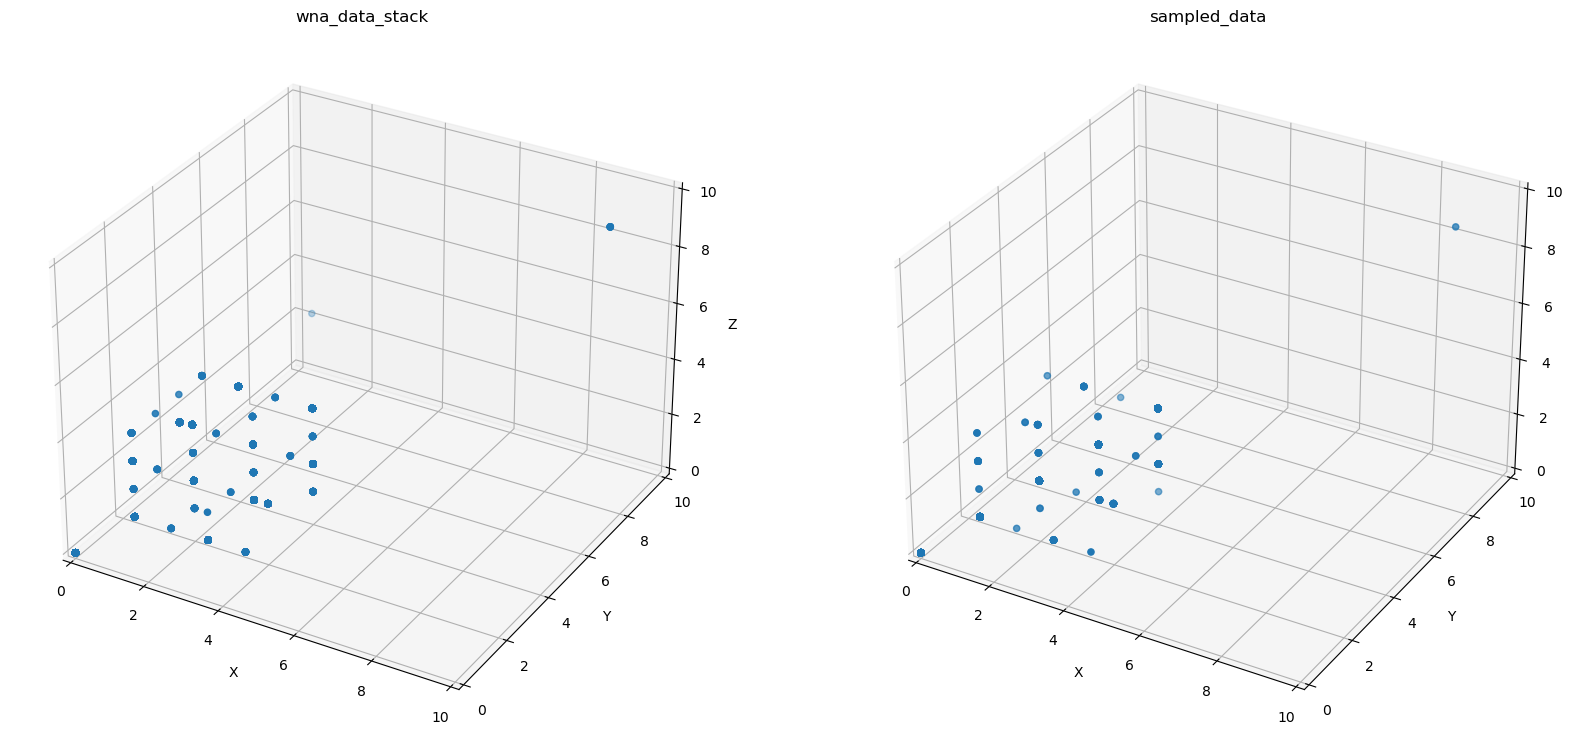

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10), subplot_kw={'projection': '3d'})

ax[0].scatter(wna_data_stack[:, 0, 0], wna_data_stack[:, 0, 1], wna_data_stack[:, 0, 2],  label='wna_data_stack')
ax[0].set_xlabel('X')
ax[0].set_ylabel('Y')
ax[0].set_zlabel('Z')
ax[0].set_title('wna_data_stack')

ax[0].set_xlim([0, 10])
ax[0].set_ylim([0, 10])
ax[0].set_zlim([0, 10])

ax[1].scatter(sampled_data[:, 0, 0], sampled_data[:, 0, 1], sampled_data[:, 0, 2], label='sampled_data')
ax[1].set_xlabel('X')
ax[1].set_ylabel('Y')
ax[1].set_zlabel('Z')
ax[1].set_title('sampled_data')

ax[1].set_xlim([0, 10])
ax[1].set_ylim([0, 10])
ax[1].set_zlim([0, 10])

# Show the plot
plt.show()


In [48]:
import pandas as pd

id_region = pd.read_csv('../data/id_region.txt', sep='\t')
id_region

,Id,region1,region2
0,K10G,KA,KA
1,K12G,KA,KA
2,K13G,KA,KA
3,K16G,KA,KA
4,K21G,KA,KA
...,...,...,...
85,metawrap_assemle_2487B,LOG,NorthA
86,metawrap_assemle_2487C,LOG,NorthA
87,metawrap_assemle_2487D,SEM,NorthA
88,metawrap_assemle_2487E,SEM,NorthA


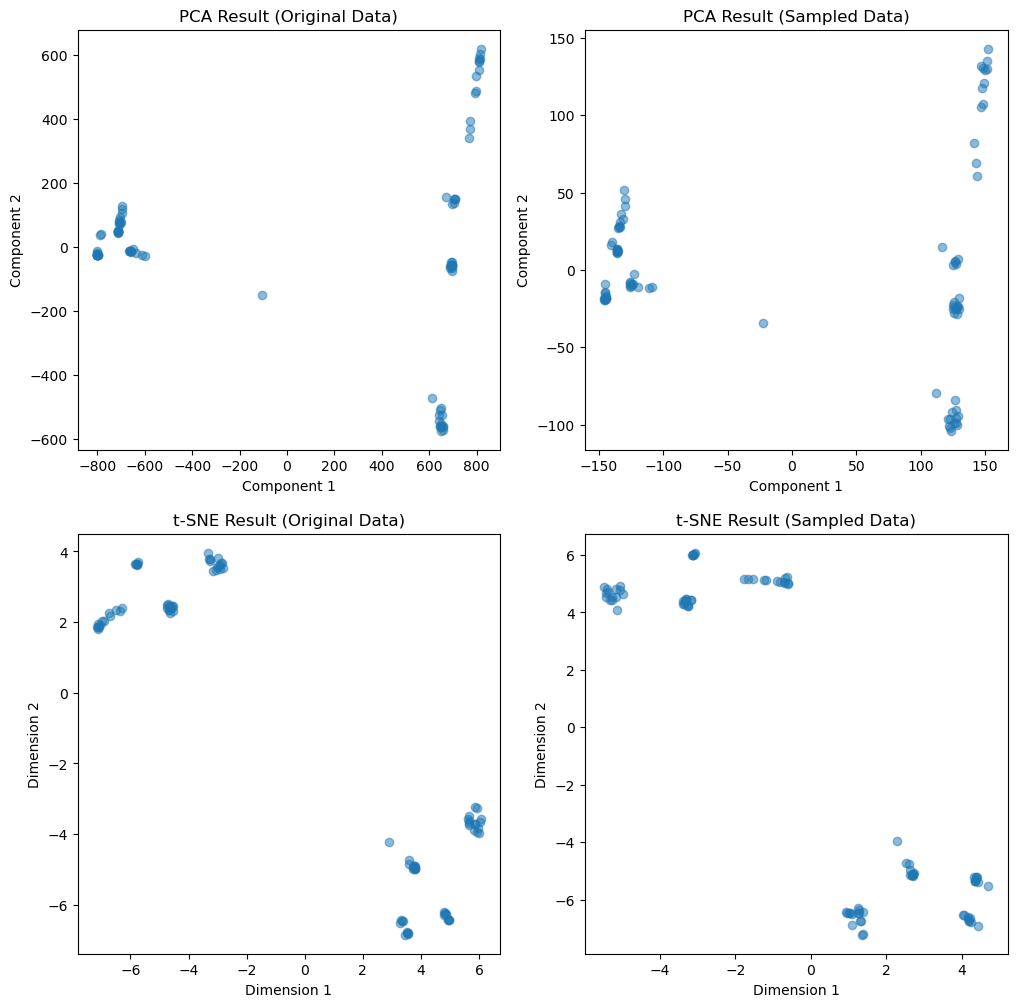

In [56]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 2, figsize=(12,12))

wna_data_stack_transposed = np.transpose(wna_data_stack, (1, 0, 2))
sampled_data_transposed = np.transpose(sampled_data, (1, 0, 2))

pca = PCA(n_components=2)
original_data_pca = pca.fit_transform(wna_data_stack_transposed.reshape(90, -1))
sampled_data_pca = pca.fit_transform(sampled_data_transposed.reshape(90, -1))

ax[0,0].scatter(original_data_pca[:, 0], original_data_pca[:, 1], alpha=0.5)
ax[0,0].set_title('PCA Result (Original Data)')
ax[0,0].set_xlabel('Component 1')
ax[0,0].set_ylabel('Component 2')

ax[0,1].scatter(sampled_data_pca[:, 0], sampled_data_pca[:, 1], alpha=0.5)
ax[0,1].set_title('PCA Result (Sampled Data)')
ax[0,1].set_xlabel('Component 1')
ax[0,1].set_ylabel('Component 2')

tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
original_data_tsne = tsne.fit_transform(wna_data_stack_transposed.reshape(90, -1))
sampled_data_tsne = tsne.fit_transform(sampled_data_transposed.reshape(90, -1))

ax[1,0].scatter(original_data_tsne[:, 0], original_data_tsne[:, 1], alpha=0.5)
ax[1,0].set_title('t-SNE Result (Original Data)')
ax[1,0].set_xlabel('Dimension 1')
ax[1,0].set_ylabel('Dimension 2')

ax[1,1].scatter(sampled_data_tsne[:, 0], sampled_data_tsne[:, 1], alpha=0.5)
ax[1,1].set_title('t-SNE Result (Sampled Data)')
ax[1,1].set_xlabel('Dimension 1')
ax[1,1].set_ylabel('Dimension 2')

plt.show()

/var/folders/wg/cnsrf0z96d31016txljrj2vc0000gn/T/ipykernel_70835/2574133895.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plt.show()


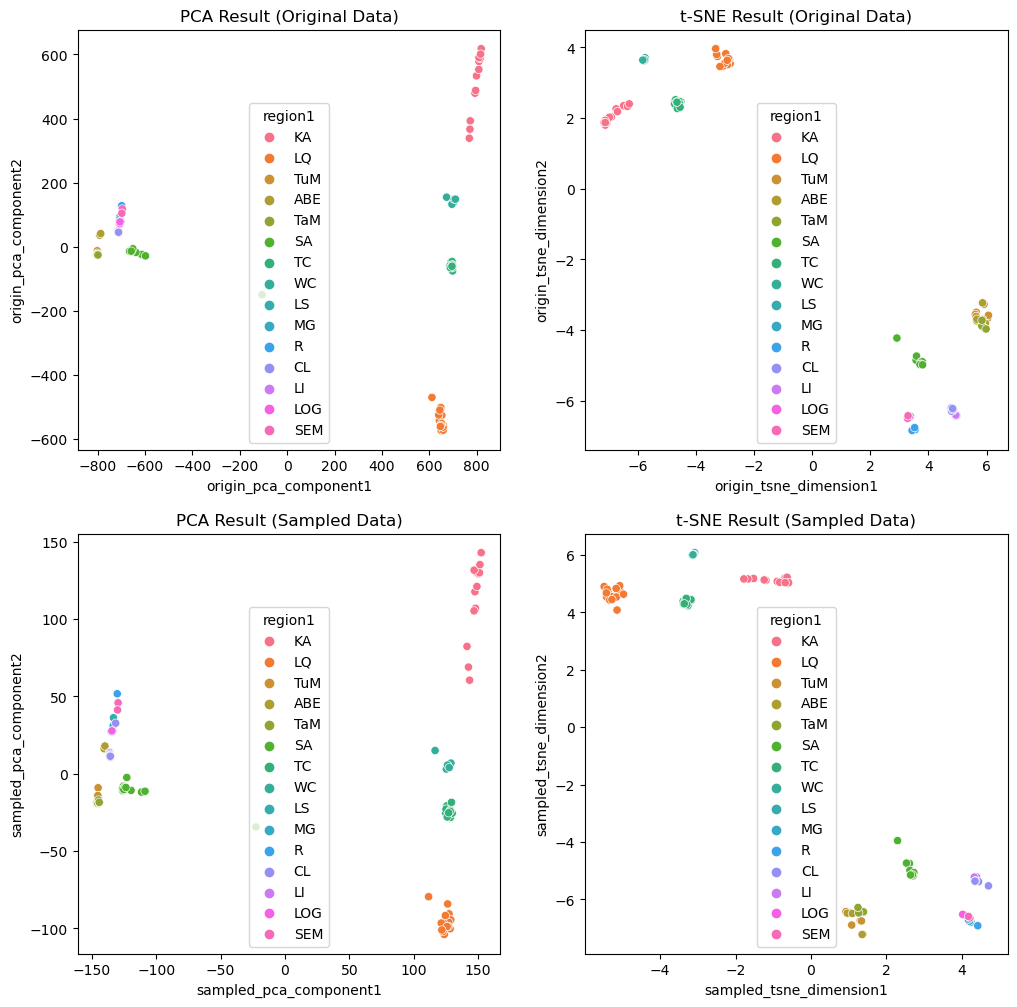

In [58]:
redimensioned_data = pd.concat([id_region,
           pd.DataFrame(original_data_pca,columns=['origin_pca_component1', 'origin_pca_component2']),
           pd.DataFrame(sampled_data_pca,columns=['sampled_pca_component1', 'sampled_pca_component2']),
           pd.DataFrame(original_data_tsne,columns=['origin_tsne_dimension1', 'origin_tsne_dimension2']),
           pd.DataFrame(sampled_data_tsne,columns=['sampled_tsne_dimension1', 'sampled_tsne_dimension2'])
           ],axis=1)

fig, ax = plt.subplots(2,2,figsize=(12,12))
sns.scatterplot(data=redimensioned_data, x="origin_pca_component1", y="origin_pca_component2", hue="region1",ax=ax[0,0])
sns.scatterplot(data=redimensioned_data, x="origin_tsne_dimension1", y="origin_tsne_dimension2", hue="region1",ax=ax[0,1])
sns.scatterplot(data=redimensioned_data, x="sampled_pca_component1", y="sampled_pca_component2", hue="region1",ax=ax[1,0])
sns.scatterplot(data=redimensioned_data, x="sampled_tsne_dimension1", y="sampled_tsne_dimension2", hue="region1",ax=ax[1,1])
ax[0,0].set_title('PCA Result (Original Data)')
ax[0,1].set_title('t-SNE Result (Original Data)')
ax[1,0].set_title('PCA Result (Sampled Data)')
ax[1,1].set_title('t-SNE Result (Sampled Data)')
plt.show()

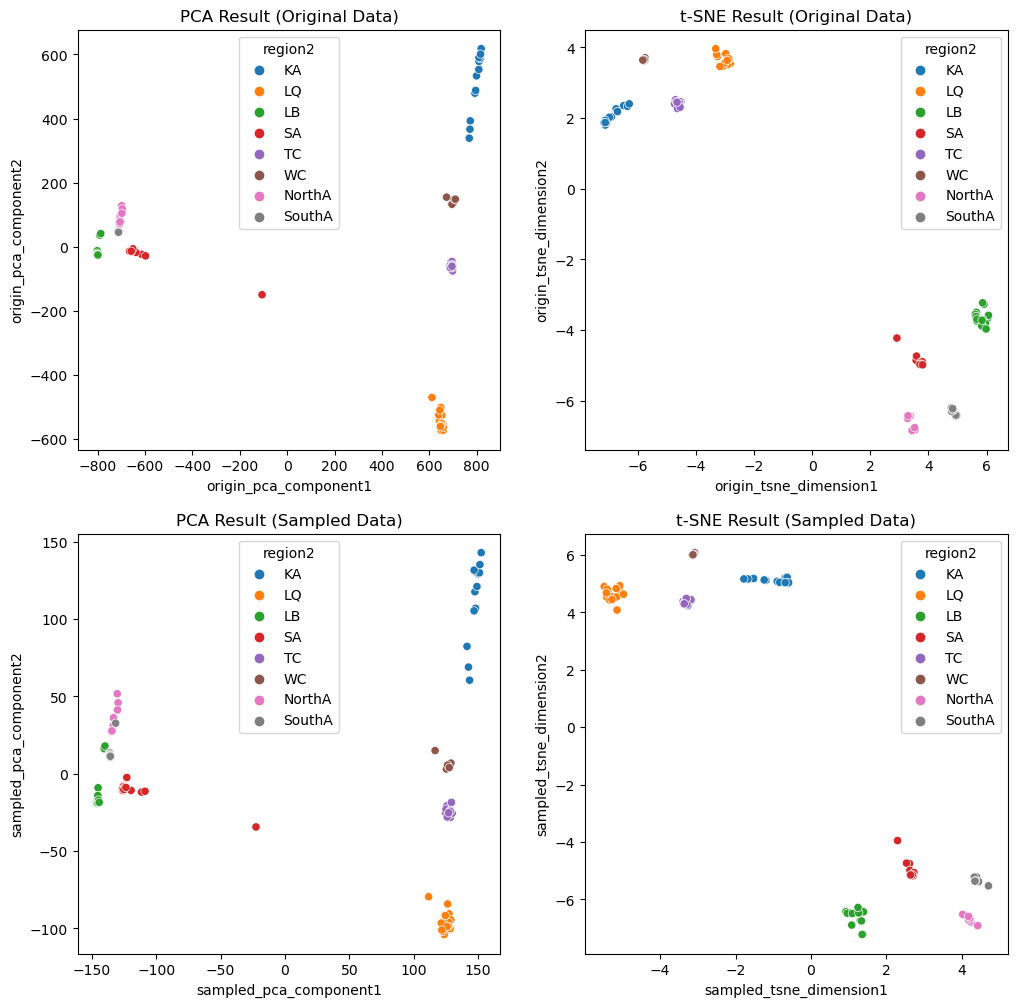

In [63]:

fig, ax = plt.subplots(2,2,figsize=(12,12))

sns.scatterplot(data=redimensioned_data, x="origin_pca_component1", y="origin_pca_component2", hue="region2",ax=ax[0,0])
sns.scatterplot(data=redimensioned_data, x="origin_tsne_dimension1", y="origin_tsne_dimension2", hue="region2",ax=ax[0,1])
sns.scatterplot(data=redimensioned_data, x="sampled_pca_component1", y="sampled_pca_component2", hue="region2",ax=ax[1,0])
sns.scatterplot(data=redimensioned_data, x="sampled_tsne_dimension1", y="sampled_tsne_dimension2", hue="region2",ax=ax[1,1])
ax[0,0].set_title('PCA Result (Original Data)')
ax[0,1].set_title('t-SNE Result (Original Data)')
ax[1,0].set_title('PCA Result (Sampled Data)')
ax[1,1].set_title('t-SNE Result (Sampled Data)')
plt.show()

In [72]:
redimensioned_data

,Id,region1,region2,origin_pca_component1,origin_pca_component2,sampled_pca_component1,sampled_pca_component2,origin_tsne_dimension1,origin_tsne_dimension2,sampled_tsne_dimension1,sampled_tsne_dimension2
0,K10G,KA,KA,810.439909,579.283196,150.141163,129.277192,-7.048969,1.926657,-0.687381,5.190143
1,K12G,KA,KA,772.499708,392.758058,141.386600,82.327979,-6.486574,2.347022,-1.521394,5.175423
2,K13G,KA,KA,771.111668,366.716474,142.544910,68.919213,-6.356490,2.327184,-1.672060,5.159439
3,K16G,KA,KA,798.814878,533.224704,147.528320,117.634572,-6.911055,2.029242,-0.894294,5.076957
4,K21G,KA,KA,818.590291,618.072326,152.392931,142.897011,-7.119077,1.798371,-0.598709,5.005461
...,...,...,...,...,...,...,...,...,...,...,...
85,metawrap_assemle_2487B,LOG,NorthA,-705.942062,71.565710,-133.950630,27.562461,3.380217,-6.446360,4.073397,-6.547184
86,metawrap_assemle_2487C,LOG,NorthA,-705.529893,77.227894,-134.326323,27.684220,3.336889,-6.464139,4.024743,-6.520470
87,metawrap_assemle_2487D,SEM,NorthA,-695.885771,117.902319,-129.552079,45.842703,3.282717,-6.503057,4.214417,-6.645427
88,metawrap_assemle_2487E,SEM,NorthA,-697.720562,104.320191,-129.957532,41.222573,3.297664,-6.429578,4.176426,-6.591371


In [76]:
redimensioned_data.to_csv('../data/p5_decomposed_data.csv',index=False)
wna_data.iloc[sampled_indices].reset_index().to_csv('../data/p5_sampled.csv',index=False)